In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
actual_df = pd.read_csv("actual.csv")
independent_df = pd.read_csv("data_set_ALL_AML_independent.csv")
train_df = pd.read_csv("data_set_ALL_AML_train.csv")

In [3]:
actual_df = actual_df.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11736\2752396477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual_df = actual_df.replace({'ALL':0,'AML':1})


In [4]:
train_to_keep = [col for col in train_df.columns if "call" not in col]
test_to_keep = [col for col in independent_df.columns if "call" not in col]

X_train_tr = train_df[train_to_keep]
X_test_tr = independent_df[test_to_keep]

In [5]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']


X_train_tr = X_train_tr.reindex(columns=train_columns_titles)
X_test_tr = X_test_tr.reindex(columns=test_columns_titles)

X_train = X_train_tr.T
X_test = X_test_tr.T

In [6]:
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [7]:
X_train = X_train.reset_index(drop=True)
y_train = actual_df[actual_df.patient <= 38].reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = actual_df[actual_df.patient > 38].reset_index(drop=True)

Classification Report:

              precision    recall  f1-score   support

         ALL       1.00      0.90      0.95        20
         AML       0.88      1.00      0.93        14

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



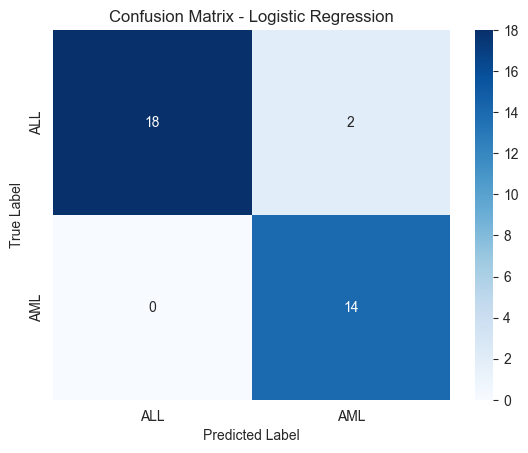

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train.iloc[:, 1])

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Evaluate performance
print("Classification Report:\n")
print(classification_report(y_test.iloc[:, 1], y_pred_lr, target_names=['ALL', 'AML']))

# Confusion matrix
cm = confusion_matrix(y_test.iloc[:, 1], y_pred_lr, labels=[0, 1])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ALL', 'AML'], yticklabels=['ALL', 'AML'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [9]:
import pandas as pd
coefficients = log_reg.coef_[0]
feature_names = X_train.columns
coef_df = pd.DataFrame({'Gene': feature_names, 'Coefficient': coefficients})


coef_df['AbsCoeff'] = coef_df['Coefficient'].abs()
top_genes_lr = coef_df.sort_values(by='AbsCoeff', ascending=False).head(10)

print("Top 10 Most Influential Genes in Logistic Regression:")
print(top_genes_lr[['Gene', 'Coefficient']])


Top 10 Most Influential Genes in Logistic Regression:
                Gene  Coefficient
6200     Y00787_s_at     0.000216
1881       M27891_at     0.000189
1673       M11147_at     0.000184
2401  M96326_rna1_at     0.000172
6208     Z19554_s_at     0.000161
2185       M69043_at     0.000159
5709     M25079_s_at     0.000159
1778       M19507_at     0.000156
1393       L20941_at     0.000140
5551     L06797_s_at    -0.000139
